In [64]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
root = '/gdrive/My Drive/Wtech/6/'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [65]:
train_set = pd.read_csv(root+"states_all.csv")

Bu ödevde [ABD Eğitim Sistemi](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)'ne ait verileri inceleyemeye devam edeceksiniz. Bu veri kümesinde eyalet bazında yıllık bir çok veri bulunmaktadır. Bu verilerin açıklamalarına yine Kaggle'dan ulaşabilirsiniz. 

Bu ödevi tamamlamak için, aşağıdaki soruların çözümlerini içeren Jupyter notebook dosyasının Github linkini gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

Öncelikle bir önceki derste uyguladağınız eksik değerleri tamamlama tekniklerinden en uygun olanını uygulayın. Aşağıdaki sorulara cevap verebilmeniz için eksik verilerin üstesinden gelmelisiniz.

1. Toplam gelir verilerini içeren *TOTAL_REVENUE* ve toplam harcama verilerini içeren *TOTAL_EXPENDITURE* değişkenlerini inceleyin. Bu değişkenler aykırı değerler içeriyor mu?

2. Toplam gelir (*TOTAL_REVENUE*) ve toplam harcama (*TOTAL_EXPENDITURE*) değişkenlerinde aykırı değer tespit ettiyseniz bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.

3. Toplam gelir (*TOTAL_REVENUE*) değişkeninden, toplam harcama (*TOTAL_EXPENDITURE*) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

4. Yine toplam gelir (*TOTAL_REVENUE*) değişkeninden, toplam harcama(*TOTAL_EXPENDITURE*) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun. Fakat bu sefer aykırı değerleri temezledikten sonra bu işlemi yapın. Bu yeni değişkende  de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.

5. Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. Bu ikisi arasında fark görüyor musunuz? 

6. Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu. Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi? 

#Eksik Veriler

In [ ]:
train_set.info()

In [67]:
train_set.drop(["AVG_MATH_4_SCORE","AVG_MATH_8_SCORE", "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"],axis=1,inplace=True)

In [ ]:
train_set.info()

In [69]:
train_set_2 = train_set.fillna(train_set.mean())

In [70]:
train_set_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1715 non-null   float64
 4   TOTAL_REVENUE                 1715 non-null   float64
 5   FEDERAL_REVENUE               1715 non-null   float64
 6   STATE_REVENUE                 1715 non-null   float64
 7   LOCAL_REVENUE                 1715 non-null   float64
 8   TOTAL_EXPENDITURE             1715 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1715 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1715 non-null   float64
 11  OTHER_EXPENDITURE             1715 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1715 non-null   float64
 13  GRA

#Sorular


1. Toplam gelir verilerini içeren TOTAL_REVENUE ve toplam harcama verilerini içeren TOTAL_EXPENDITURE değişkenlerini inceleyin. Bu değişkenler aykırı değerler içeriyor mu?

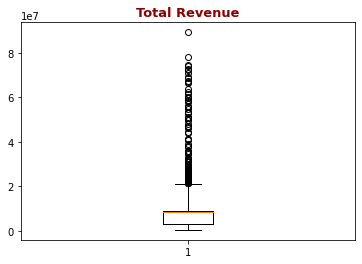

In [71]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
plt.boxplot(train_set_2["TOTAL_REVENUE"], whis=2 )
plt.title("Total Revenue", fontdict=baslik_font)
plt.show()

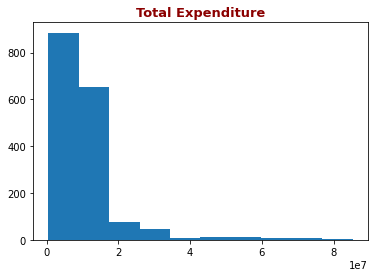

In [72]:
plt.hist(train_set_2["TOTAL_EXPENDITURE"])
plt.title("Total Expenditure", fontdict=baslik_font)
plt.show()

In [73]:
from scipy.stats import zscore

z_scores = zscore(train_set_2["TOTAL_EXPENDITURE"])
for threshold in range(1,5):
    print("Eşik değeri: {}".format(threshold))
    print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Eşik değeri: 1
Aykırı değerlerin sayısı: 150
------
Eşik değeri: 2
Aykırı değerlerin sayısı: 62
------
Eşik değeri: 3
Aykırı değerlerin sayısı: 44
------
Eşik değeri: 4
Aykırı değerlerin sayısı: 33
------


2. Toplam gelir (TOTAL_REVENUE) ve toplam harcama (TOTAL_EXPENDITURE) değişkenlerinde aykırı değer tespit ettiyseniz bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.

In [84]:
from scipy.stats.mstats import winsorize

winsorize_revenue = winsorize(train_set_2["TOTAL_REVENUE"], (0, 0.10)) # Yüzde 90
winsorize_expenditure = winsorize(train_set_2["TOTAL_EXPENDITURE"], (0, 0.10)) # Yüzde 90


In [85]:
train_set_2["TOTAL_REVENUE"] = winsorize_revenue
train_set_2["TOTAL_EXPENDITURE"] = winsorize_expenditure

In [63]:
z_scores = zscore(train_set_2["TOTAL_EXPENDITURE"])
for threshold in range(1,5):
    print("Eşik değeri: {}".format(threshold))
    print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Eşik değeri: 1
Aykırı değerlerin sayısı: 262
------
Eşik değeri: 2
Aykırı değerlerin sayısı: 172
------
Eşik değeri: 3
Aykırı değerlerin sayısı: 0
------
Eşik değeri: 4
Aykırı değerlerin sayısı: 0
------


3. Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

In [ ]:
new_column = pd.DataFrame(train_set_2["TOTAL_REVENUE"]-train_set_2["TOTAL_EXPENDITURE"],columns=["BUTCE_ACIGI"])
new_column

In [81]:
z_scores = zscore(new_column["BUTCE_ACIGI"])
for threshold in range(1,5):
    print("Eşik değeri: {}".format(threshold))
    print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Eşik değeri: 1
Aykırı değerlerin sayısı: 87
------
Eşik değeri: 2
Aykırı değerlerin sayısı: 24
------
Eşik değeri: 3
Aykırı değerlerin sayısı: 9
------
Eşik değeri: 4
Aykırı değerlerin sayısı: 3
------


In [82]:
winsorize_acik = winsorize(new_column["BUTCE_ACIGI"], (0, 0.05)) # Yüzde 95
new_column["BUTCE_ACIGI"] = winsorize_acik

In [83]:
z_scores = zscore(new_column["BUTCE_ACIGI"])
for threshold in range(1,5):
    print("Eşik değeri: {}".format(threshold))
    print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Eşik değeri: 1
Aykırı değerlerin sayısı: 106
------
Eşik değeri: 2
Aykırı değerlerin sayısı: 0
------
Eşik değeri: 3
Aykırı değerlerin sayısı: 0
------
Eşik değeri: 4
Aykırı değerlerin sayısı: 0
------


4. Yine toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama(TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun. Fakat bu sefer aykırı değerleri temezledikten sonra bu işlemi yapın. Bu yeni değişkende de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.

In [86]:
new_column2 = pd.DataFrame(train_set_2["TOTAL_REVENUE"]-train_set_2["TOTAL_EXPENDITURE"],columns=["BUTCE_ACIGI"])

In [91]:
z_scores = zscore(new_column2["BUTCE_ACIGI"])
for threshold in range(1,5):
    print("Eşik değeri: {}".format(threshold))
    print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Eşik değeri: 1
Aykırı değerlerin sayısı: 114
------
Eşik değeri: 2
Aykırı değerlerin sayısı: 44
------
Eşik değeri: 3
Aykırı değerlerin sayısı: 14
------
Eşik değeri: 4
Aykırı değerlerin sayısı: 10
------


Aykırı değerler var

In [ ]:
winsorize_acik = winsorize(new_column2["BUTCE_ACIGI"], (0, 0.05)) # Yüzde 95
new_column2["BUTCE_ACIGI"] = winsorize_acik
z_scores = zscore(new_column2["BUTCE_ACIGI"])
for threshold in range(1,5):
    print("Eşik değeri: {}".format(threshold))
    print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

5. Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. Bu ikisi arasında fark görüyor musunuz?

6. Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu. Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi?

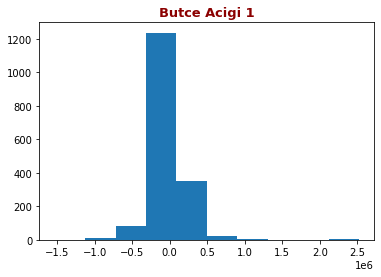

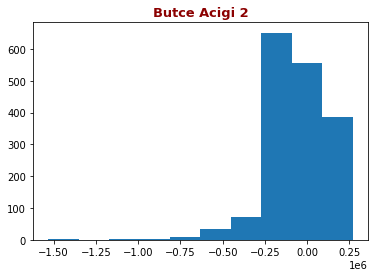

In [93]:
plt.hist(new_column["BUTCE_ACIGI"])
plt.title("Butce Acigi 1", fontdict=baslik_font)
plt.show()
plt.hist(new_column2["BUTCE_ACIGI"])
plt.title("Butce Acigi 2", fontdict=baslik_font)
plt.show()

Üçüncü soruda uygulanan yöntem daha mantıklı sonuçlar verdi.